In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Q3

In [3]:
np.random.seed(42)
#normal
mean1 = [0, 0]
cov1 = [[0.1, 0], [0, 0.3]]
#fault
mean2 = [-1, 0]
cov2 = [[0.3, 0], [0, 0.2]]

# Generate random data with Gaussian distribution for two classes
class1 = np.random.multivariate_normal(mean1, cov1, 1000)
class2 = np.random.multivariate_normal(mean2, cov2, 1000)

# Concatenate data points and corresponding labels for training the perceptron
X = np.concatenate((class1, class2))
y = np.concatenate((np.ones(len(class1)), -np.ones(len(class2))))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
from scipy.stats import multivariate_normal

class BayesianClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = np.array([X[y == c].mean(axis=0) for c in self.classes])
        self.covs = np.array([np.cov(X[y == c].T) + 0.01*np.eye(X.shape[1]) for c in self.classes])
        self.priors = np.array([np.mean(y == c) for c in self.classes])
        
    def predict(self, X, use_loss=False, loss_matrix=None):
        probs = [multivariate_normal.pdf(X, mean=m, cov=c) for m, c in zip(self.means, self.covs)]
        likelihood = np.array(probs).T
        evidence = np.sum(likelihood * self.priors, axis=1)
        posterior = likelihood * self.priors / evidence[:, np.newaxis]
        if use_loss and loss_matrix is not None:
            expected_loss = np.dot(posterior, loss_matrix)
            return self.classes[np.argmin(expected_loss, axis=1)]
        else:
            return self.classes[np.argmax(posterior, axis=1)]

without loss matrix

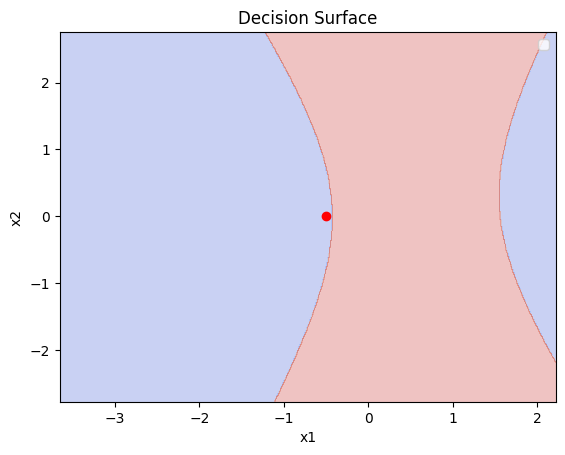

In [7]:
classifier = BayesianClassifier()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Compute the predicted class for each point in the meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.plot(-0.5,0,'ro')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Surface')
plt.legend()
plt.show()


with loss matrix

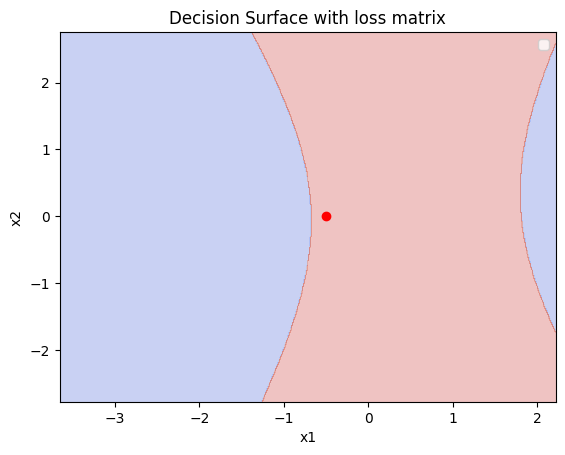

In [15]:
loss_matrix = np.array([[0, 1], [5, 0]])
y_pred_with_loss = classifier.predict(X_test, use_loss=True, loss_matrix=loss_matrix)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Compute the predicted class for each point in the meshgrid
Z_with_loss = classifier.predict(np.c_[xx.ravel(), yy.ravel()], use_loss=True, loss_matrix=loss_matrix)
Z_with_loss = Z_with_loss.reshape(xx.shape)

plt.contourf(xx, yy, Z_with_loss, alpha=0.3, cmap='coolwarm')
plt.plot(-0.5,0,'ro')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Surface with loss matrix')
plt.legend()
plt.show()


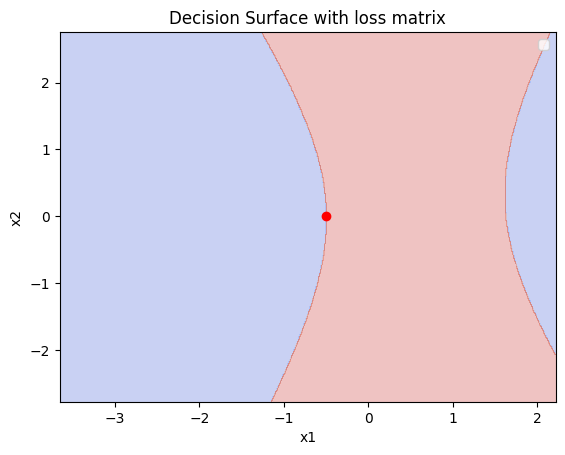

In [19]:
loss_matrix = np.array([[0, 1], [1.5, 0]])
y_pred_with_loss = classifier.predict(X_test, use_loss=True, loss_matrix=loss_matrix)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Compute the predicted class for each point in the meshgrid
Z_with_loss = classifier.predict(np.c_[xx.ravel(), yy.ravel()], use_loss=True, loss_matrix=loss_matrix)
Z_with_loss = Z_with_loss.reshape(xx.shape)

plt.contourf(xx, yy, Z_with_loss, alpha=0.3, cmap='coolwarm')
plt.plot(-0.5,0,'ro')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Surface with loss matrix')
plt.legend()
plt.show()


Linear Classifier- Perceptron

In [59]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

perceptron = Perceptron(eta0=0.01)

# fit the classifier to the training data
perceptron.fit(X_train, y_train)

# make predictions on the test data
y_pred = perceptron.predict(X_test)

Finding the Decision surface

In [60]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Compute the predicted class for each point in the meshgrid
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


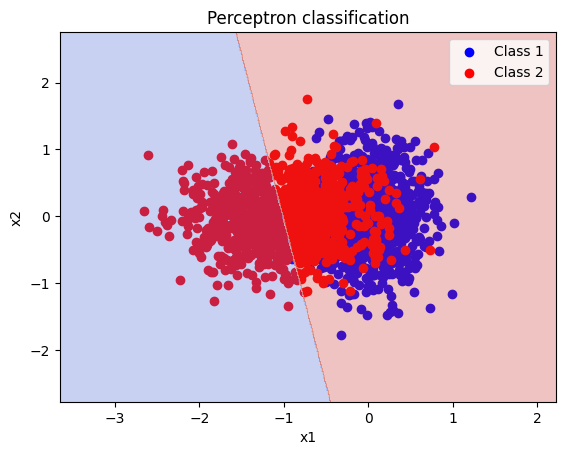

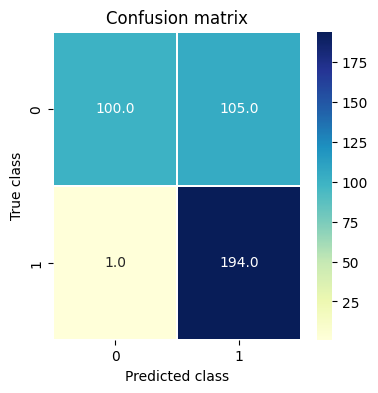

Acc= 0.735
MAR= 0.2586616635397123
FAR= 0.34381171823568135
Precision= [0.99009901 0.64882943]
Recall= [0.48780488 0.99487179]


In [61]:
plt.scatter(class1[:, 0], class1[:, 1], c='b', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], c='r', label='Class 2')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron classification')
plt.legend()
plt.show()


conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# print("Confusion matrix= ")
plt.figure(figsize=(4,4))
import seaborn as sn
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = np.sum(TP) / np.sum(conf)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

In [77]:
perceptron = Perceptron(eta0=0.45)

# fit the classifier to the training data
perceptron.fit(X_train, y_train)

# make predictions on the test data
y_pred = perceptron.predict(X_test)

Finding the Decision surface

In [78]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Compute the predicted class for each point in the meshgrid
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


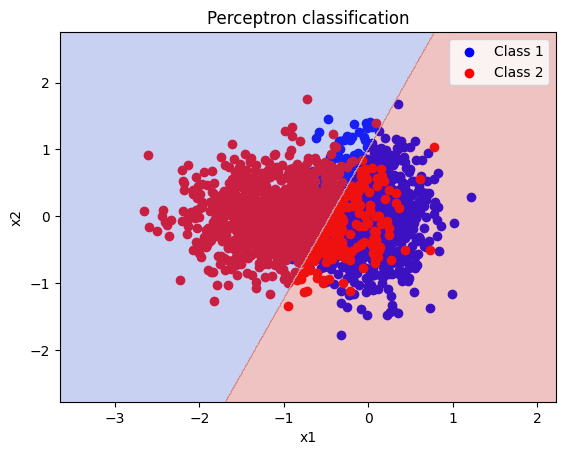

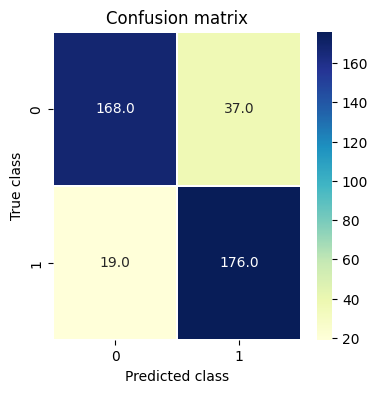

Acc= 0.86
MAR= 0.1389618511569731
FAR= 0.24167760871244304
Precision= [0.89839572 0.82629108]
Recall= [0.8195122 0.9025641]


In [79]:
plt.scatter(class1[:, 0], class1[:, 1], c='b', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], c='r', label='Class 2')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron classification')
plt.legend()
plt.show()


conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# print("Confusion matrix= ")
plt.figure(figsize=(4,4))
import seaborn as sn
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = np.sum(TP) / np.sum(conf)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

Bayesian Classifier without loss

In [80]:
classifier = BayesianClassifier()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


In [81]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

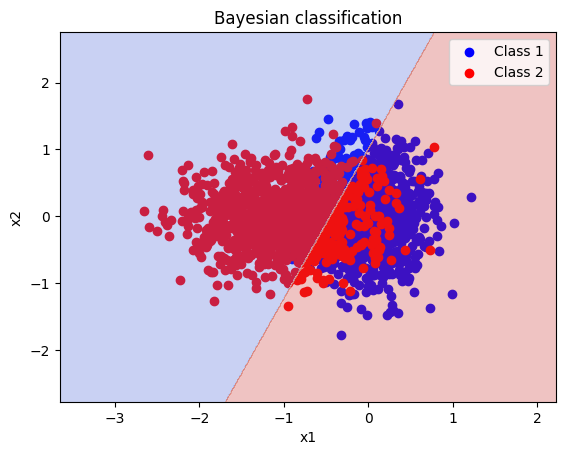

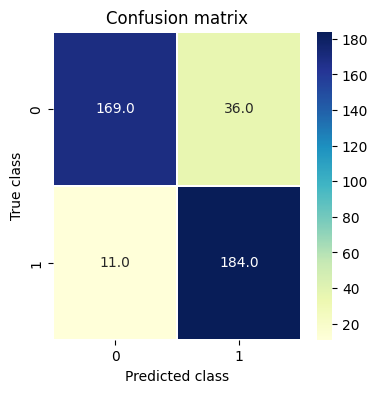

Acc= 0.8825
MAR= 0.11601000625390868
FAR= 0.20277565161342304
Precision= [0.93888889 0.83636364]
Recall= [0.82439024 0.94358974]


In [82]:
plt.scatter(class1[:, 0], class1[:, 1], c='b', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], c='r', label='Class 2')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayesian classification')
plt.legend()
plt.show()


conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# print("Confusion matrix= ")
plt.figure(figsize=(4,4))
import seaborn as sn
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = np.sum(TP) / np.sum(conf)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

Bayesian Classifier with loss

In [111]:
loss_matrix = np.array([[0, 1.5], [0.7, 0]])
y_pred_with_loss = classifier.predict(X_test, use_loss=True, loss_matrix=loss_matrix)

In [112]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Compute the predicted class for each point in the meshgrid
Z_with_loss = classifier.predict(np.c_[xx.ravel(), yy.ravel()], use_loss=True, loss_matrix=loss_matrix)
Z_with_loss = Z_with_loss.reshape(xx.shape)

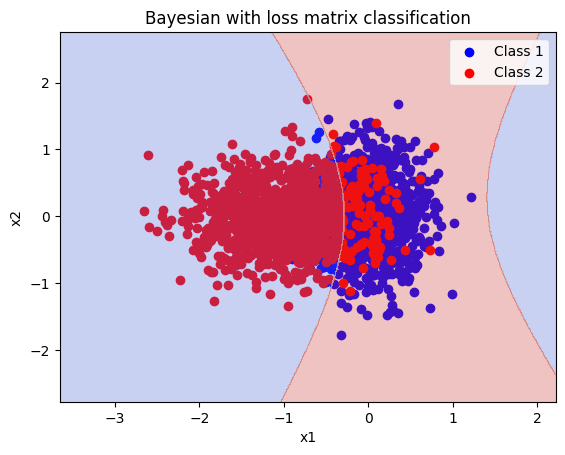

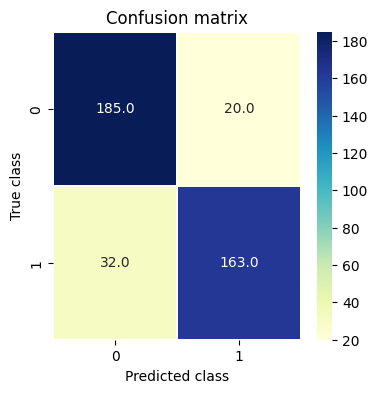

Acc= 0.87
MAR= 0.1308317698561601
FAR= 0.2298580518844836
Precision= [0.85253456 0.89071038]
Recall= [0.90243902 0.83589744]


In [113]:
plt.scatter(class1[:, 0], class1[:, 1], c='b', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], c='r', label='Class 2')
plt.contourf(xx, yy, Z_with_loss, alpha=0.3, cmap='coolwarm')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bayesian with loss matrix classification')
plt.legend()
plt.show()


conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred_with_loss)
# print("Confusion matrix= ")
plt.figure(figsize=(4,4))
import seaborn as sn
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = np.sum(TP) / np.sum(conf)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

# Q4

Parzen Classifier bandwidth=0.5

In [193]:
np.random.seed(42)
#normal
mean1 = [0, 0]
cov1 = [[0.1, 0], [0, 0.3]]
#fault
mean2 = [-1, 0]
cov2 = [[0.3, 0], [0, 0.2]]

# Generate random data with Gaussian distribution for two classes
class1 = np.random.multivariate_normal(mean1, cov1, 1000)
class2 = np.random.multivariate_normal(mean2, cov2, 1000)

# Concatenate data points and corresponding labels for training the perceptron
X = np.concatenate((class1, class2))
y = np.concatenate((np.ones(len(class1)), np.zeros(len(class2))))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [194]:
from sklearn.neighbors import KernelDensity as KDE
kde_models = []
for i in range(2): #number of classes
    kde = KDE(kernel='gaussian', bandwidth=0.5)
    kde.fit(X_train[y_train == i])
    kde_models.append(kde)

  # Calculate the probability densities for each observation in the testing dataset
prob_densities = []
for i in range(len(X_test)):
    prob_densities_i = [kde.score_samples([X_test[i]])[0] for kde in kde_models]
    prob_densities.append(prob_densities_i)

  # Assign a class label to each observation based on the highest probability density
y_pred = np.argmax(prob_densities, axis=1)


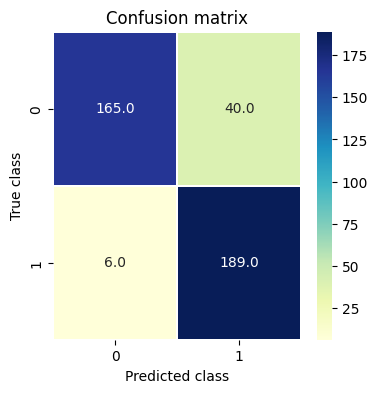

Acc= 0.885
MAR= 0.11294559099437149
FAR= 0.19311605239110569
Precision= [0.96491228 0.82532751]
Recall= [0.80487805 0.96923077]


In [195]:
conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# print("Confusion matrix= ")
plt.figure(figsize=(4,4))
import seaborn as sn
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = np.sum(TP) / np.sum(conf)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

Finding the best bandwidth

Gaussian kernel

In [218]:
from sklearn.neighbors import KernelDensity as KDE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

bw_1= np.arange(1, 2, 0.1)   #change if nessesary
acc_s_1=[]
MAR_1=[]
FAR_1=[]
for b in bw_1:
  kde_models = []
  for i in range(2):
      kde = KDE(kernel='gaussian', bandwidth=b)
      kde.fit(X_train[y_train == i])
      kde_models.append(kde)

  # Calculate the probability densities for each observation in the testing dataset
  prob_densities = []
  for i in range(len(X_test)):
      prob_densities_i = [kde.score_samples([X_test[i]])[0] for kde in kde_models]
      prob_densities.append(prob_densities_i)

  # Assign a class label to each observation based on the highest probability density
  y_pred = np.argmax(prob_densities, axis=1)
  conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  acc_s_1.append(accuracy_score(y_test, y_pred))
  TP = np.diag(conf)
  FP = np.sum(conf, axis=0) - TP
  FN = np.sum(conf, axis=1) - TP
  TN = np.sum(conf) - TP - FP - FN
  MAR_1.append(np.mean(FN / (FN + TP)))
  FAR_1.append(np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN)))
  print("I'm done @bw= {0}".format(b))

I'm done @bw= 1.0
I'm done @bw= 1.1
I'm done @bw= 1.2000000000000002
I'm done @bw= 1.3000000000000003
I'm done @bw= 1.4000000000000004
I'm done @bw= 1.5000000000000004
I'm done @bw= 1.6000000000000005
I'm done @bw= 1.7000000000000006
I'm done @bw= 1.8000000000000007
I'm done @bw= 1.9000000000000008


The best BW is: 1.3000000000000003 with acc=0.8825 shown with red dot
The prefered acc based by ROC is:0.8825 shown with cayn dot


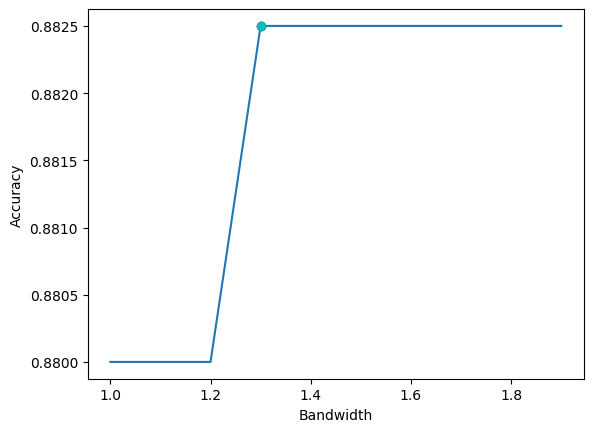

In [219]:
min_idx = np.argmin(MAR_1)

min_x = FAR_1[min_idx]
min_y = MAR_1[min_idx]

print("The best BW is: {0} with acc={1} shown with red dot\nThe prefered acc based by ROC is:{2} shown with cayn dot".format(bw_1[np.argmax(acc_s_1)],np.max(acc_s_1),acc_s_1[min_idx]))
fig, ax = plt.subplots()
ax.plot(bw_1, acc_s_1)
plt.plot(bw_1[np.argmax(acc_s_1)], np.max(acc_s_1), 'ro')
plt.plot(bw_1[min_idx],acc_s_1[min_idx],'co')
ax.set_xlabel('Bandwidth')
ax.set_ylabel('Accuracy')
plt.show()

Accuracy @local min=0.8825
BW @local min=1.3000000000000003


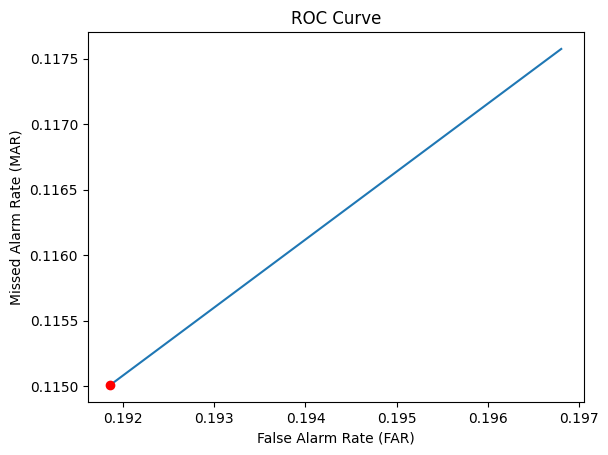

In [220]:
print("Accuracy @local min={0}".format(acc_s_1[min_idx]))
print("BW @local min={0}".format(bw_1[min_idx]))
best_bw=bw_1[min_idx]
fig, ax = plt.subplots()
plt.plot(FAR_1, MAR_1)
plt.plot(min_x, min_y, 'ro')
plt.xlabel('False Alarm Rate (FAR)')
plt.ylabel('Missed Alarm Rate (MAR)')
plt.title('ROC Curve')
# plt.legend()
plt.show()

Parzen with best_bw

In [221]:
from sklearn.neighbors import KernelDensity as KDE
kde_models = []
for i in range(2): #number of classes
    kde = KDE(kernel='gaussian', bandwidth=best_bw)
    kde.fit(X_train[y_train == i])
    kde_models.append(kde)

  # Calculate the probability densities for each observation in the testing dataset
prob_densities = []
for i in range(len(X_test)):
    prob_densities_i = [kde.score_samples([X_test[i]])[0] for kde in kde_models]
    prob_densities.append(prob_densities_i)

  # Assign a class label to each observation based on the highest probability density
y_pred = np.argmax(prob_densities, axis=1)


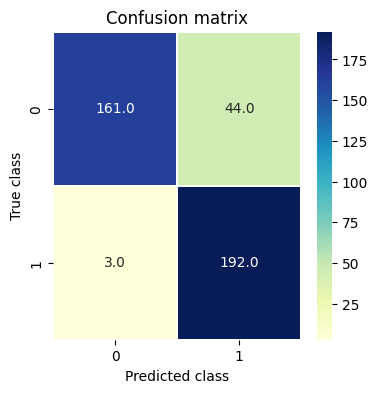

Acc= 0.8825
MAR= 0.1150093808630394
FAR= 0.19185834246075212
Precision= [0.98170732 0.81355932]
Recall= [0.78536585 0.98461538]


In [222]:
conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# print("Confusion matrix= ")
plt.figure(figsize=(4,4))
import seaborn as sn
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = np.sum(TP) / np.sum(conf)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

with tophat kernel

In [223]:
from sklearn.neighbors import KernelDensity as KDE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

bw_1= np.arange(0.4, 0.8, 0.05)   #change if nessesary
acc_s_1=[]
MAR_1=[]
FAR_1=[]
for b in bw_1:
  kde_models = []
  for i in range(2):
      kde = KDE(kernel='tophat', bandwidth=b)
      kde.fit(X_train[y_train == i])
      kde_models.append(kde)

  # Calculate the probability densities for each observation in the testing dataset
  prob_densities = []
  for i in range(len(X_test)):
      prob_densities_i = [kde.score_samples([X_test[i]])[0] for kde in kde_models]
      prob_densities.append(prob_densities_i)

  # Assign a class label to each observation based on the highest probability density
  y_pred = np.argmax(prob_densities, axis=1)
  conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  acc_s_1.append(accuracy_score(y_test, y_pred))
  TP = np.diag(conf)
  FP = np.sum(conf, axis=0) - TP
  FN = np.sum(conf, axis=1) - TP
  TN = np.sum(conf) - TP - FP - FN
  MAR_1.append(np.mean(FN / (FN + TP)))
  FAR_1.append(np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN)))
  print("I'm done @bw= {0}".format(b))

I'm done @bw= 0.4
I'm done @bw= 0.45
I'm done @bw= 0.5
I'm done @bw= 0.55
I'm done @bw= 0.6
I'm done @bw= 0.6499999999999999
I'm done @bw= 0.7
I'm done @bw= 0.75


The best BW is: 0.55 with acc=0.8925 shown with red dot
The prefered acc based by ROC is:0.8925 shown with cayn dot


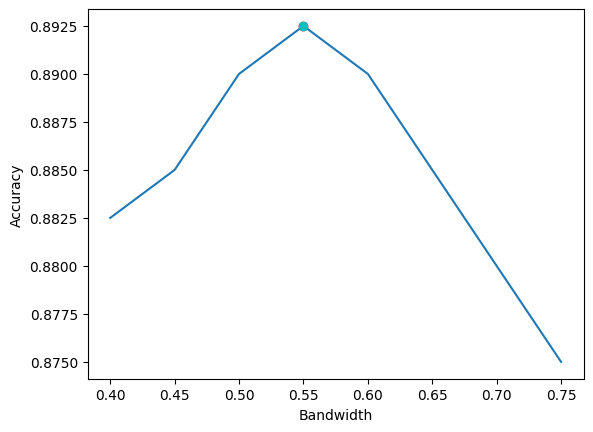

In [224]:
min_idx = np.argmin(MAR_1)

min_x = FAR_1[min_idx]
min_y = MAR_1[min_idx]

print("The best BW is: {0} with acc={1} shown with red dot\nThe prefered acc based by ROC is:{2} shown with cayn dot".format(bw_1[np.argmax(acc_s_1)],np.max(acc_s_1),acc_s_1[min_idx]))
fig, ax = plt.subplots()
ax.plot(bw_1, acc_s_1)
plt.plot(bw_1[np.argmax(acc_s_1)], np.max(acc_s_1), 'ro')
plt.plot(bw_1[min_idx],acc_s_1[min_idx],'co')
ax.set_xlabel('Bandwidth')
ax.set_ylabel('Accuracy')
plt.show()

Accuracy @local min=0.8925
BW @local min=0.55


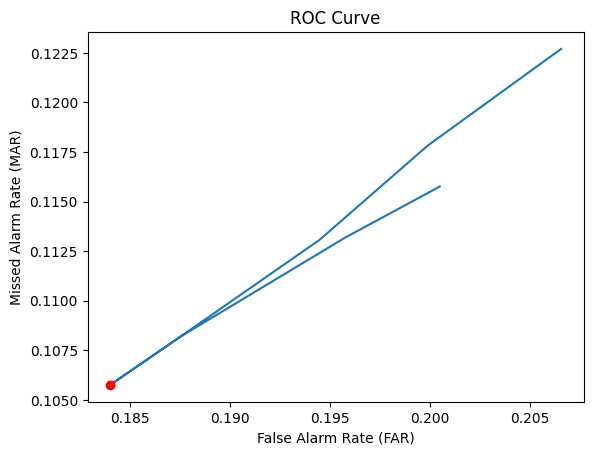

In [225]:
print("Accuracy @local min={0}".format(acc_s_1[min_idx]))
print("BW @local min={0}".format(bw_1[min_idx]))
best_bw=bw_1[min_idx]
fig, ax = plt.subplots()
plt.plot(FAR_1, MAR_1)
plt.plot(min_x, min_y, 'ro')
plt.xlabel('False Alarm Rate (FAR)')
plt.ylabel('Missed Alarm Rate (MAR)')
plt.title('ROC Curve')
# plt.legend()
plt.show()

Parzen with best_bw

In [227]:
from sklearn.neighbors import KernelDensity as KDE
kde_models = []
for i in range(2): #number of classes
    kde = KDE(kernel='tophat', bandwidth=best_bw)
    kde.fit(X_train[y_train == i])
    kde_models.append(kde)

  # Calculate the probability densities for each observation in the testing dataset
prob_densities = []
for i in range(len(X_test)):
    prob_densities_i = [kde.score_samples([X_test[i]])[0] for kde in kde_models]
    prob_densities.append(prob_densities_i)

  # Assign a class label to each observation based on the highest probability density
y_pred = np.argmax(prob_densities, axis=1)


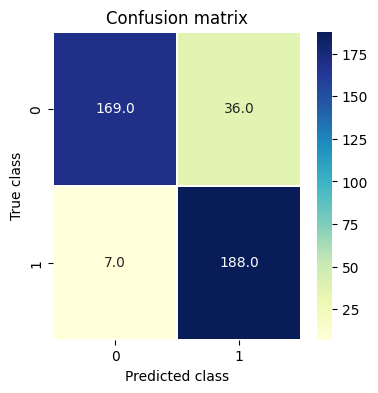

Acc= 0.8925
MAR= 0.10575359599749842
FAR= 0.1840310587075305
Precision= [0.96022727 0.83928571]
Recall= [0.82439024 0.96410256]


In [228]:
conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# print("Confusion matrix= ")
plt.figure(figsize=(4,4))
import seaborn as sn
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = accuracy_score(y_test, y_pred)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

KnN

In [229]:
np.random.seed(42)
#normal
mean1 = [0, 0]
cov1 = [[0.1, 0], [0, 0.3]]
#fault
mean2 = [-1, 0]
cov2 = [[0.3, 0], [0, 0.2]]

# Generate random data with Gaussian distribution for two classes
class1 = np.random.multivariate_normal(mean1, cov1, 1000)
class2 = np.random.multivariate_normal(mean2, cov2, 1000)

# Concatenate data points and corresponding labels for training the perceptron
X = np.concatenate((class1, class2))
y = np.concatenate((np.ones(len(class1)), np.zeros(len(class2))))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [230]:
from collections import Counter
from scipy.spatial import cKDTree

class KNNClassifier:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.tree = cKDTree(X)
    
    def predict(self, X):
        _, indices = self.tree.query(X, k=self.k)
        k_labels = self.y_train[indices]
        y_pred = np.array([Counter(labels).most_common()[0][0] for labels in k_labels.squeeze()])
        return y_pred




In [231]:
knn = KNNClassifier(k=3)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

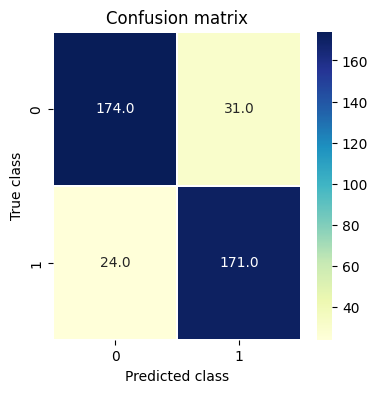

Acc= 0.8625
MAR= 0.13714821763602253
FAR= 0.24094497329928025
Precision= [0.87878788 0.84653465]
Recall= [0.84878049 0.87692308]


In [233]:
conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# print("Confusion matrix= ")
plt.figure(figsize=(4,4))
import seaborn as sn
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = np.sum(TP) / np.sum(conf)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

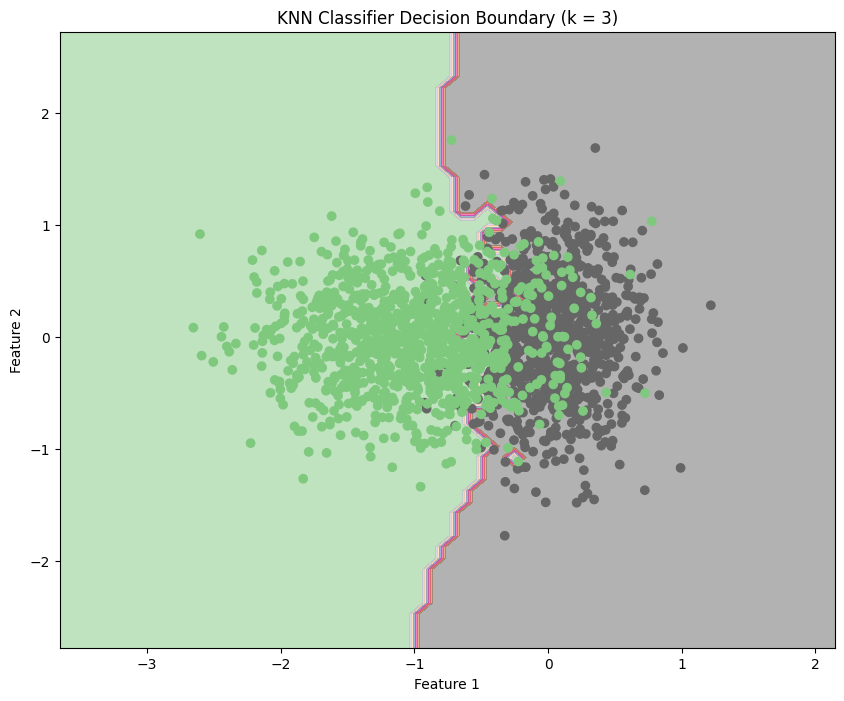

In [232]:
# Plot the decision boundary
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Define the meshgrid boundaries and step size
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for all points in the meshgrid
Z = knn.predict(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classifier Decision Boundary (k = {})'.format(knn.k))
plt.show()


Finding the best k

In [247]:
K=np.arange(2, 40, 1)
accuracies=[]
MARs=[]
FARs=[]
for i,ki in enumerate(K):
  MAR=0
  FAR=0
  knn = KNNClassifier(k=ki)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  conf_k = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

  TP = np.diag(conf_k)
  FN = np.sum(conf_k, axis=1) - TP
  FP = np.sum(conf_k, axis=0) - TP
  TN = np.sum(conf_k) - TP - FP - FN
  MAR = np.mean(FN / (FN + TP))
  FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
  MARs.append(MAR)
  FARs.append(FAR)



The Maximum accuracy is for k=35 with acc=0.89


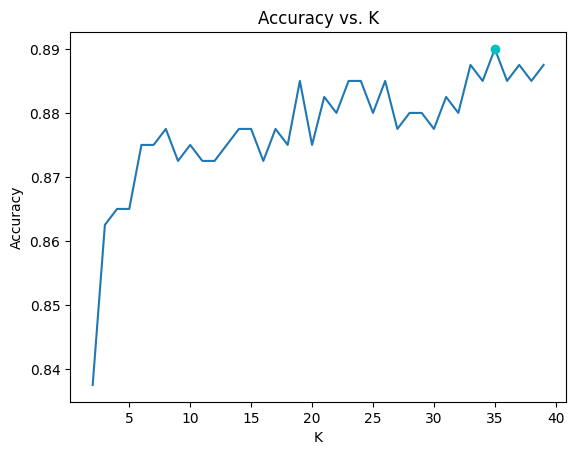

In [248]:
print("The Maximum accuracy is for k={0} with acc={1}".format(K[np.argmax(accuracies)],np.max(accuracies)))
fig, ax = plt.subplots()
plt.plot(K, accuracies)
plt.plot(K[np.argmax(accuracies)],np.max(accuracies),'co')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
# plt.legend()
plt.show()

The best K with respect ROC is k=35 with acc=0.89


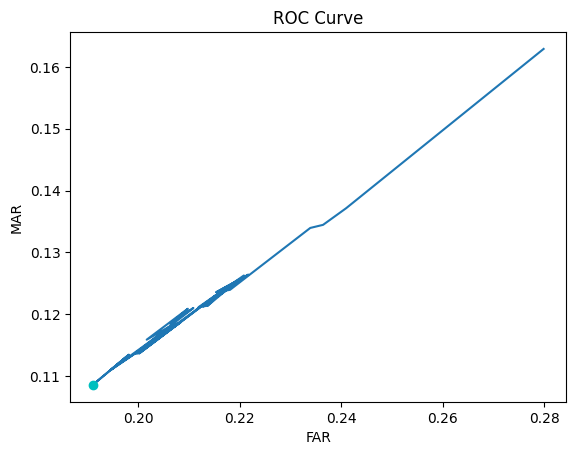

In [249]:
print("The best K with respect ROC is k={0} with acc={1}".format(K[np.argmin(MARs)],accuracies[np.argmin(MARs)]))
best_k=K[np.argmin(MARs)]
fig, ax = plt.subplots()
plt.plot(FARs, MARs)
plt.plot(FARs[np.argmin(MARs)],np.min(MARs),'co')
plt.xlabel('FAR')
plt.ylabel('MAR')
plt.title('ROC Curve')
# plt.legend()
plt.show()

KnN with best_k

In [250]:
knn = KNNClassifier(k=best_k)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

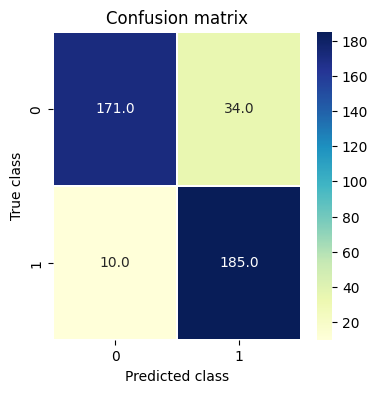

Acc= 0.89
MAR= 0.10856785490931833
FAR= 0.1910399020308195
Precision= [0.94475138 0.84474886]
Recall= [0.83414634 0.94871795]


In [251]:
conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# print("Confusion matrix= ")
plt.figure(figsize=(4,4))
import seaborn as sn
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = np.sum(TP) / np.sum(conf)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

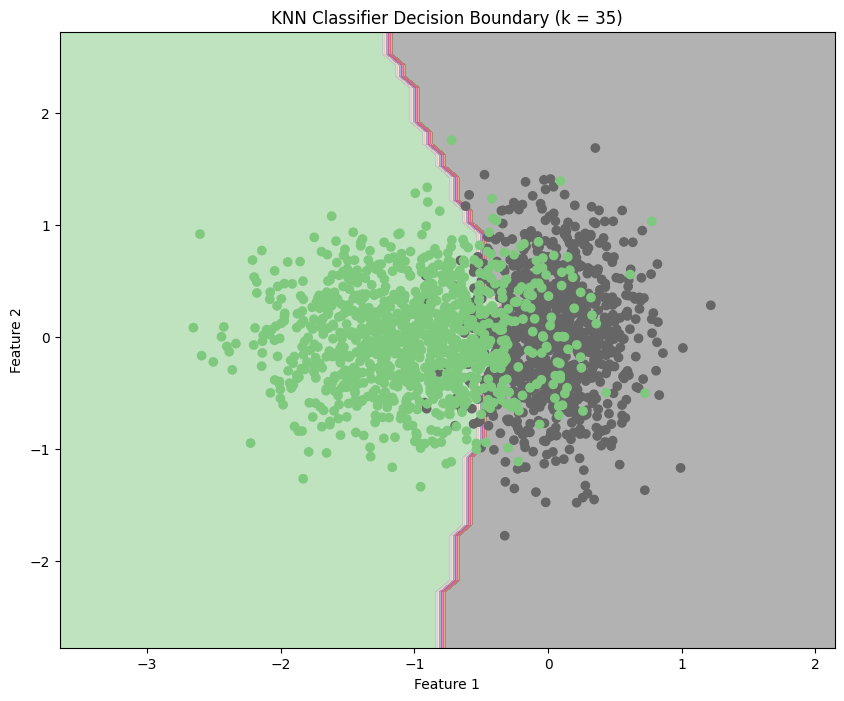

In [252]:
# Plot the decision boundary
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Define the meshgrid boundaries and step size
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for all points in the meshgrid
Z = knn.predict(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classifier Decision Boundary (k = {})'.format(knn.k))
plt.show()
